<b>Venture Capital Capstone Project</b><br>
Utilizing the Crunchbase dataset (as of year-end 2013), we attempt to look at various features available to discern common metrics for success or failure. 

In [2]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

In [3]:
#Import data - Raw dataframes from Crunchbase
acq_df = pd.read_csv('C:/datascience/springboard/projects/Venture Capital/data/crunchbase-acquisitions.csv', encoding="ISO-8859-1") 
inv_df = pd.read_csv('C:/datascience/springboard/projects/Venture Capital/data/crunchbase-investments.csv', encoding="ISO-8859-1")
comp_df = pd.read_csv('C:/datascience/springboard/projects/Venture Capital/data/crunchbase-companies.csv', encoding="ISO-8859-1")
rds_df = pd.read_csv('C:/datascience/springboard/projects/Venture Capital/data/crunchbase-rounds.csv', encoding="ISO-8859-1")

#Merged dataframe from four dataframes above
comp_sum_df = pd.read_csv('C:/datascience/springboard/projects/Venture Capital/data/Exported Data/Company summary df - Updated.csv', encoding="ISO-8859-1")

#Dataframe in ML friendly format with all features
ml_df = pd.read_csv('C:/datascience/springboard/projects/Venture Capital/data/Exported Data/ML Dataframe - Updated.csv', encoding="ISO-8859-1")

C:\Users\KKanoe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\KKanoe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10,11,12,14,15,16,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Display dataframe information
print("Crunchbase Acquisition Information")
acq_df.info()
print("Crunchbase Investor Information")
inv_df.info()
print("Crunchbase Company Information")
comp_df.info()
print("Crunchbase Investment Rounds Information")
rds_df.info()
print("Merged Dataframe")
comp_sum_df.info(verbose=True)
print("Features Dataframe")
ml_df.info(verbose=True)

Crunchbase Acquisition Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 20 columns):
company_permalink         4651 non-null object
company_name              4651 non-null object
company_category_code     3933 non-null object
company_country_code      4651 non-null object
company_state_code        4543 non-null object
company_region            4651 non-null object
company_city              4532 non-null object
acquirer_permalink        4651 non-null object
acquirer_name             4651 non-null object
acquirer_category_code    4137 non-null object
acquirer_country_code     4384 non-null object
acquirer_state_code       3877 non-null object
acquirer_region           4651 non-null object
acquirer_city             4262 non-null object
acquired_at               4651 non-null object
acquired_month            4651 non-null object
acquired_quarter          4651 non-null object
acquired_year             4651 non-null float64
price_amoun

Number of Unique Companies: 17727
Number of Unique Investors: 10466


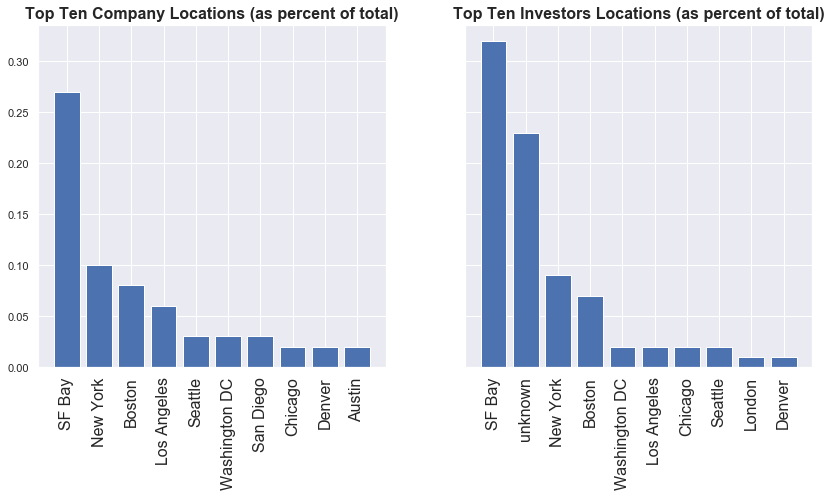

In [5]:
#Display value counts to discern scope of Company Dataset
print('Number of Unique Companies:', len(comp_df['name'].unique())) 
print('Number of Unique Investors:', len(inv_df['investor_name'].unique()))

#Top 10 metrics (as percent of total)
co_reg = round(comp_df['region'].value_counts()/len(comp_df['name'].unique()), 2)[0:10] #Company Location
inv_reg = round(inv_df['investor_region'].value_counts()/len(inv_df), 2)[0:10] #Investor Location

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(12,7), sharey=True)

#Company Location
ax1.bar(co_reg.index, co_reg[0:10])
ax1.set_title("Top Ten Company Locations (as percent of total)", fontweight='bold', size = 16)
plt.setp(ax1.get_xticklabels(), rotation=90, fontsize=16)

#Investor Location
ax2.bar(inv_reg.index, inv_reg[0:10])
ax2.set_title("Top Ten Investors Locations (as percent of total)", fontweight='bold', size = 16)
plt.setp(ax2.get_xticklabels(), rotation=90, fontsize=16)


fig.tight_layout()
plt.show()

The saviest investors will raise the most money, therefore ranking investors based on amount invested makes sense as the determining factor of prestige and/or validation of a company's product. My sense is that it would be an important feature in determining success or failure of a funded startup as the larger investors not only provide capital, but intangible value such as intellectual property, a deep bench of advisors, and broader VC experience. I evaluate each round individually as the investors by round should influence company success (i.e. first round - not well recognized investors, second round - well recognized investors = traction)

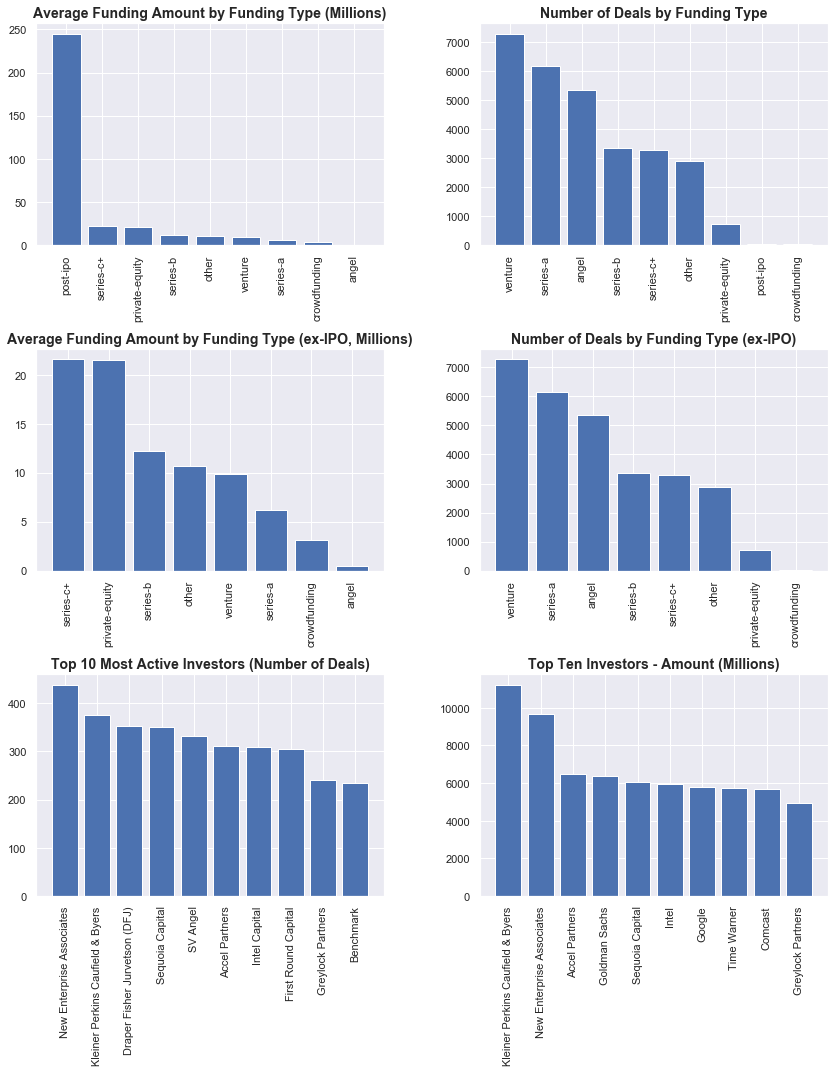

In [6]:
#Funding Type EDA
rds_amt = round(rds_df.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False), 0)/1000000
rds_ct = rds_df.groupby('funding_round_type')['raised_amount_usd'].count().sort_values(ascending=False)

#Since Post-IPO implies success and it has outlier levels of funding, we view funding type exclduing IPO
rds_df_ex_ipo = rds_df[rds_df['funding_round_type'] != 'post-ipo']
rds_amt_ex_ipo = round(rds_df_ex_ipo.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False), 0)/1000000
rds_ct_ex_ipo = rds_df_ex_ipo.groupby('funding_round_type')['raised_amount_usd'].count().sort_values(ascending=False)

#Investor Summay data
inv_amt = round(inv_df.groupby('investor_name')['raised_amount_usd'].sum().sort_values(ascending=False), 0)/1000000
inv_freq = round(inv_df.groupby('investor_name')['raised_amount_usd'].count().sort_values(ascending=False), 0)

#Graph various funding type metrics
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12,15))

#Amount raised by round type
ax1.bar(rds_amt.index[0:10], rds_amt[0:10])
ax1.set_title("Average Funding Amount by Funding Type (Millions)", fontweight='bold', size = 14)
plt.setp(ax1.get_xticklabels(), rotation=90)

#Number of deals by round type
ax2.bar(rds_ct.index[0:10], rds_ct[0:10])
ax2.set_title("Number of Deals by Funding Type", fontweight='bold', size = 14)
plt.setp(ax2.get_xticklabels(), rotation=90)

#Amount raised by round type (ex-IPO)
ax3.bar(rds_amt_ex_ipo.index[0:10], rds_amt_ex_ipo[0:10])
ax3.set_title("Average Funding Amount by Funding Type (ex-IPO, Millions)", fontweight='bold', size = 14)
plt.setp(ax3.get_xticklabels(), rotation=90)

#Number of deals by round type (ex-IPO)
ax4.bar(rds_ct_ex_ipo.index[0:10], rds_ct_ex_ipo[0:10])
ax4.set_title("Number of Deals by Funding Type (ex-IPO)", fontweight='bold', size = 14)
plt.setp(ax4.get_xticklabels(), rotation=90)

#Amount raised by round type
ax5.bar(inv_freq.index[0:10], inv_freq[0:10])
ax5.set_title("Top 10 Most Active Investors (Number of Deals)", fontweight='bold', size = 14)
plt.setp(ax5.get_xticklabels(), rotation=90)

#Top Investors
ax6.bar(inv_amt.index[0:10], inv_amt[0:10])
ax6.set_title("Top Ten Investors - Amount (Millions)", fontweight='bold', size = 14)
plt.setp(ax6.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

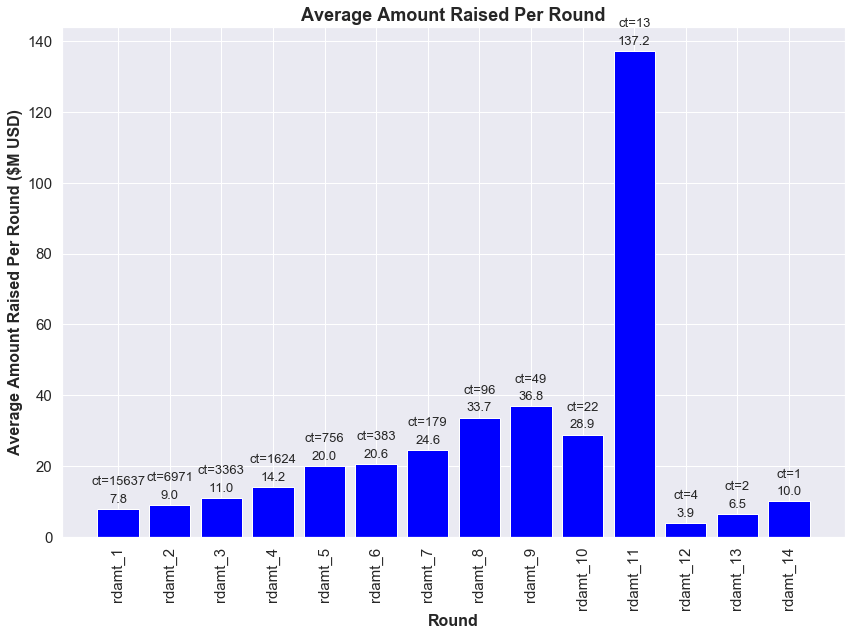

In [34]:
#Average Amount Raised per Round
start_col_amt = ml_df.columns.get_loc('rdamt_1')
end_col_amt =  ml_df.columns.get_loc('rdamt_14') + 1
avg_by_rd = ml_df.iloc[:, start_col_amt:end_col_amt]
avg_by_rd = avg_by_rd.replace(0, np.NaN)
avg_by_rd = avg_by_rd.stack().reset_index(name='rd_amt').rename(columns={'level_1':'rd_id'})
rd_ct = avg_by_rd.groupby('rd_id').count().reset_index().rename(columns={'index':'rd_id','rd_amt':'rd_ct'})
avg_by_rd = avg_by_rd.groupby('rd_id')['rd_amt'].mean().round(2).reset_index().rename(columns={'rd_amt':'rd_amt_mean'})
avg_by_rd = pd.merge(avg_by_rd, rd_ct, on='rd_id')
avg_by_rd = avg_by_rd.sort_values('rd_ct', ascending=False)

#Graph average amt raised for each rounds and append values to top of bars
fig, ax = plt.subplots(figsize=(12,9))   
ax.bar(avg_by_rd['rd_id'], avg_by_rd['rd_amt_mean'], color="blue")
plt.title('Average Amount Raised Per Round', fontsize=18, fontweight='bold')
plt.xlabel('Round', fontsize=16, fontweight='bold')
plt.ylabel('Average Amount Raised Per Round ($M USD)', fontsize=16, fontweight='bold')      
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=15)
plt.setp(ax.yaxis.get_majorticklabels(), fontsize=15)

rects = ax.patches

#Labels
labels = avg_by_rd['rd_amt_mean'].tolist()
labels2 = avg_by_rd['rd_ct'].tolist()

for rect, label, label2 in zip(rects, labels, labels2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, round(label, 1),
            ha='center', va='bottom', size=13)
    
    ax.text(rect.get_x() + rect.get_width() / 2, height + 6, "ct=" + str(round(label2, 0)),
            ha='center', va='bottom', size=13)

plt.tight_layout()
plt.show()

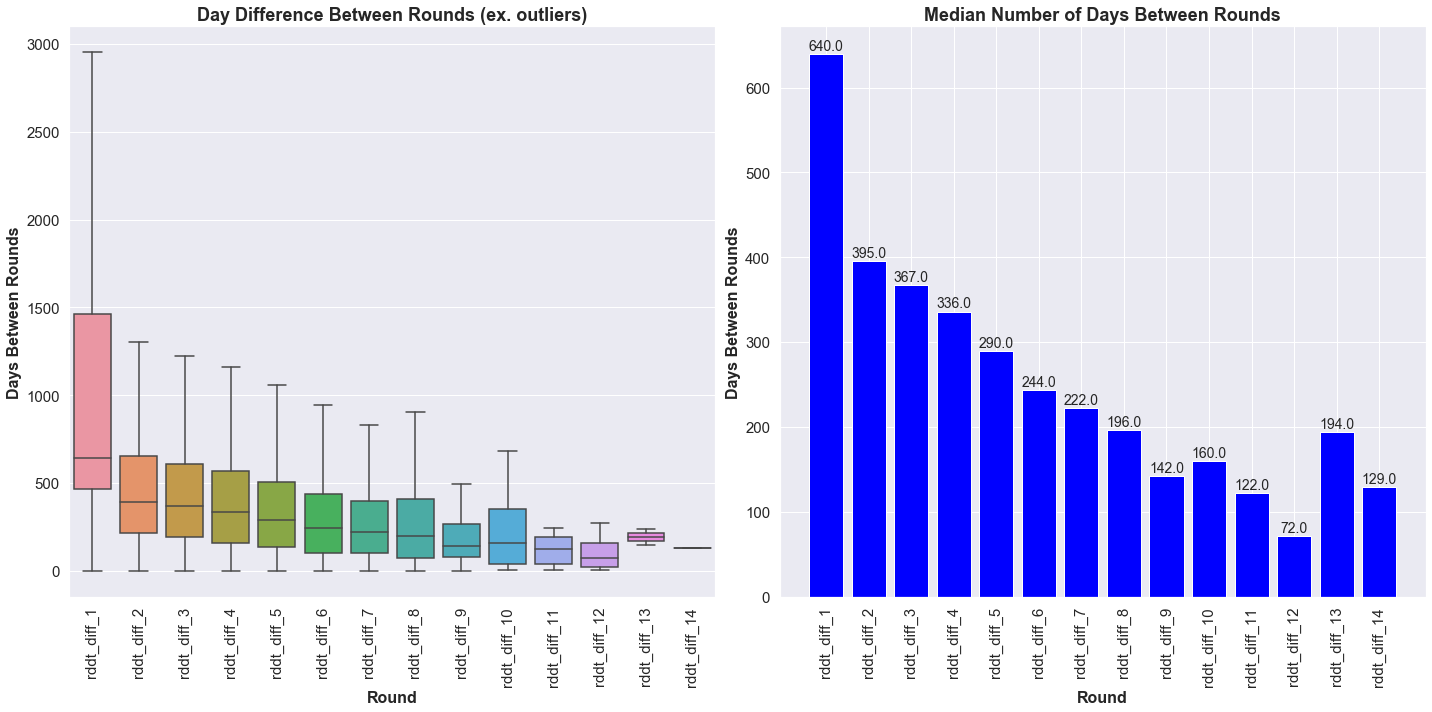

In [13]:
#Days Between Rounds
start_col_amt = ml_df.columns.get_loc('rddt_diff_1')
end_col_amt =  ml_df.columns.get_loc('rddt_diff_14') + 1
time_rds_df = ml_df.iloc[:, start_col_amt:end_col_amt]
time_rds_df = time_rds_df.replace(0, np.NaN)
time_rds_df = time_rds_df.stack().reset_index(name='rddt_diff').rename(columns={'level_1':'rd_id'})

rd_ct = time_rds_df.groupby('rd_id').count().reset_index().rename(columns={'rddt_diff':'rddt_diff_ct'})
time_rds_df_agg = time_rds_df.groupby('rd_id')['rddt_diff'].median().round(0).reset_index().rename(columns={'rddt_diff':'rddt_diff_mean'})
time_rds_df_agg = pd.merge(time_rds_df_agg, rd_ct, on='rd_id')
time_rds_df_agg = time_rds_df_agg.sort_values('rddt_diff_ct', ascending=False)

#Rounds 1-14
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10)) 
sns.boxplot(x='rd_id', y='rddt_diff', data=time_rds_df, ax=ax1, showfliers=False)
ax1.set_title("Day Difference Between Rounds (ex. outliers)", fontsize=18, fontweight='bold')
ax1.set_xlabel('Round', fontsize=16, fontweight='bold')
ax1.set_ylabel('Days Between Rounds', fontsize=16, fontweight='bold')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, fontsize=15)
plt.setp(ax1.yaxis.get_majorticklabels(), fontsize=15)

#Days between rounds bar graph    
ax2.bar(time_rds_df_agg['rd_id'], time_rds_df_agg['rddt_diff_mean'], color="blue")
ax2.set_title('Median Number of Days Between Rounds', fontsize=18, fontweight='bold')
ax2.set_xlabel('Round', fontsize=16, fontweight='bold')
ax2.set_ylabel('Days Between Rounds', fontsize=16, fontweight='bold')      
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90, fontsize=15)
plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=15)

rects = ax2.patches

#Labels
labels = time_rds_df_agg['rddt_diff_mean'].tolist()
labels2 = time_rds_df_agg['rddt_diff_ct'].tolist()

for rect, label, label2 in zip(rects, labels, labels2):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height + 1, round(label, 1),
             ha='center', va='bottom', size=14)

plt.tight_layout()
plt.show()

fig.savefig('C:/datascience/springboard/projects/Venture Capital/Graphs/Boxplot Day Differences.png')


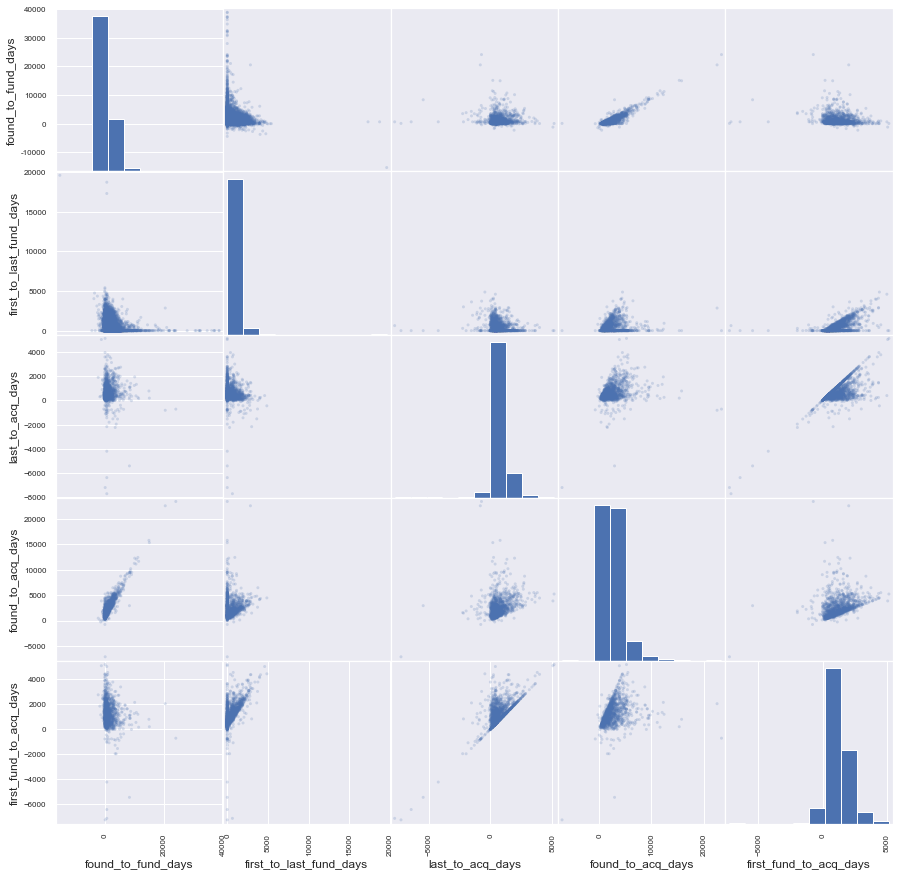

In [15]:
#Look at potential time features to assess ranges
time_df = comp_sum_df[['status','found_to_fund_days','first_to_last_fund_days','last_to_acq_days', 'found_to_acq_days','first_fund_to_acq_days']].set_index('status')
time_df = time_df.apply(pd.to_numeric)

#Plot using scattermatrix
pd.plotting.scatter_matrix(time_df, alpha=0.2, figsize=(15, 15))
plt.show()

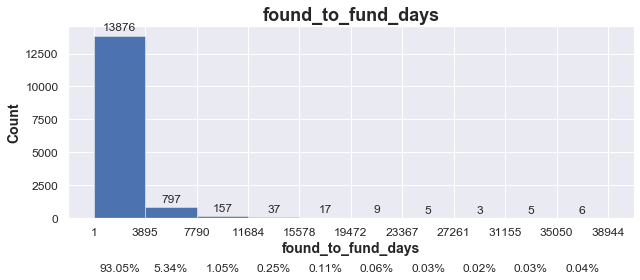

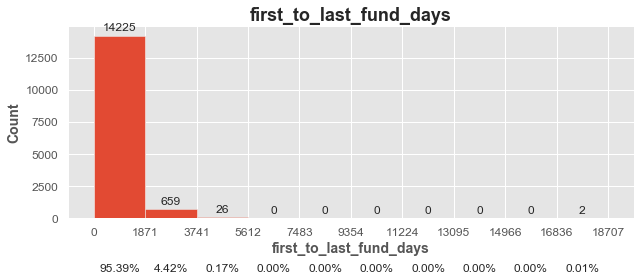

In [16]:
#Look at potential time features to assess ranges
time_df = comp_sum_df[['status','found_to_fund_days','first_to_last_fund_days']].set_index('status')

#time_df_sub = time_df.reset_index()
time_df_sub = time_df[time_df['found_to_fund_days'] > 0]

for col in time_df_sub.columns:

    fig, ax = plt.subplots(figsize = (9,4))
    plt.style.use('ggplot')
    counts, bins, patches = ax.hist(time_df_sub[col])
    ax.set_xticks(bins)
    ax.tick_params(axis='x', direction='out', labelsize=12)
    ax.tick_params(axis='y', direction='out', labelsize=12)
    ax.set_title(col, fontsize=18, weight='bold')
    ax.set_xlabel(col, fontsize=14, weight='bold')
    ax.set_ylabel('Count', fontsize=14, weight='bold')

    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for patch, count, x in zip(patches, counts, bin_centers):
        #Get x and y placement of label
        y_value = patch.get_height()
        x_value = patch.get_x() + patch.get_width() / 2

        #Number of points between bar and label
        space = 3

        #Vertical alignment of positive values
        va = 'bottom'

        #If value of bar is negative: place label below
        if y_value < 0:
            space *= -1
            va = 'top'

        #Use y-value as label and format number with zero decimal place
        label = "{:.0f}".format(y_value)

        #Create annotation
        plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords='offset points', ha='center', va=va, size=12)

        #Label the issuer percentages 
        percent = '%00.2f%%' % (100* float(count) / counts.sum())
        ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'), xytext=(0, -45), textcoords='offset points', 
                    va='top', ha='center', size=12)

    plt.tight_layout()